# Customer Churn Analysis

## Business Problem
Perusahaan mengalami kehilangan pelanggan (churn).
Project ini bertujuan menganalisis faktor penyebab churn agar perusahaan dapat mengurangi kehilangan customer.

## Objective
- Mengidentifikasi faktor yang mempengaruhi churn
- Menganalisis karakteristik customer yang churn
- Memberikan rekomendasi bisnis untuk mengurangi churn

## Business Impact
Hasil analisis dapat membantu perusahaan meningkatkan retensi pelanggan dan meningkatkan revenue.


# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Load Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PORTOFOLIO/TELCOM/telecom_churn.csv")

df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
print("Jumlah data dan kolom:", df.shape)
df.info()
df.describe()

Jumlah data dan kolom: (3333, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [ ]:
df.duplicated().sum()
df = df.drop_duplicates()

## Data Description
Dataset berisi informasi pelanggan seperti:
- tenure → lama berlangganan
- MonthlyCharges → biaya bulanan
- TotalCharges → total biaya
- Contract → tipe kontrak
- Churn → status pelanggan (target)

In [ ]:
df.isnull().sum()

,0
Churn,0
AccountWeeks,0
ContractRenewal,0
DataPlan,0
DataUsage,0
CustServCalls,0
DayMins,0
DayCalls,0
MonthlyCharge,0
OverageFee,0


In [ ]:
df["Churn"].value_counts()
df["Churn"].value_counts(normalize=True)*100

,proportion
Churn,
0,85.508551
1,14.491449


<Axes: xlabel='Churn'>

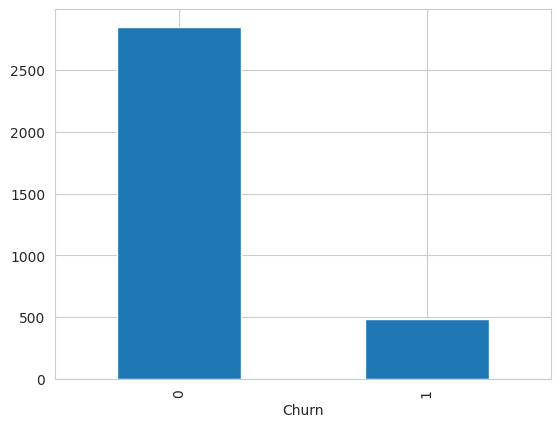

In [ ]:
df["Churn"].value_counts().plot(kind="bar")

In [ ]:
df.groupby("Churn").mean()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,,,,,,,,,,
0,100.793684,0.934737,0.295439,0.862151,1.449825,175.175754,100.283158,55.816246,9.954618,10.158877
1,102.664596,0.716356,0.165631,0.546957,2.229814,206.914079,101.335404,59.190062,10.623085,10.700000


In [ ]:
churn_rate = df["Churn"].mean()*100
print("Churn Rate:", churn_rate)

Churn Rate: 14.491449144914492


# EDA

# Distribusi Customer Churn

In [ ]:
df["Churn"].value_counts()

,count
Churn,
0,2850
1,483


In [ ]:
df["Churn"].value_counts(normalize=True) * 100

,proportion
Churn,
0,85.508551
1,14.491449


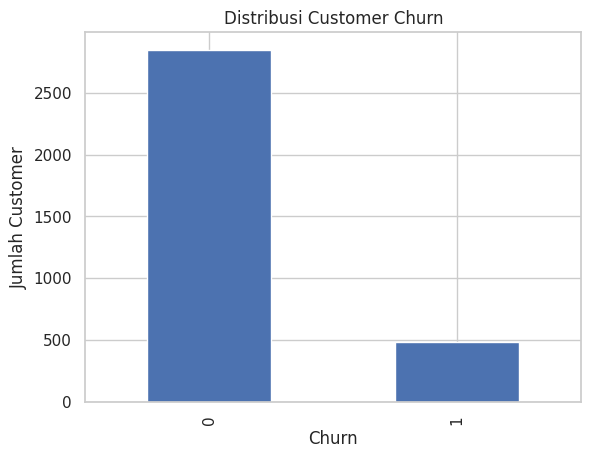

In [ ]:
df["Churn"].value_counts().plot(kind="bar")
plt.title("Distribusi Customer Churn")
plt.xlabel("Churn")
plt.ylabel("Jumlah Customer")
plt.show()

# Statistik Rata-rata Berdasarkan Churn

In [ ]:
df.groupby("Churn").mean(numeric_only=True)

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,,,,,,,,,,
0,100.793684,0.934737,0.295439,0.862151,1.449825,175.175754,100.283158,55.816246,9.954618,10.158877
1,102.664596,0.716356,0.165631,0.546957,2.229814,206.914079,101.335404,59.190062,10.623085,10.700000


# Visualisasi Faktor Penyebab Churn

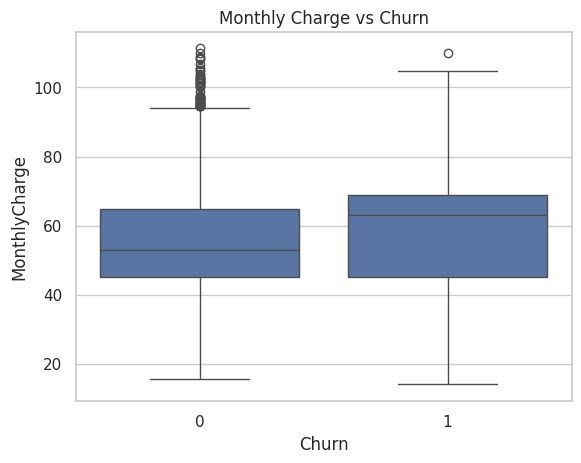

In [ ]:
import seaborn as sns

sns.boxplot(x="Churn", y="MonthlyCharge", data=df)
plt.title("Monthly Charge vs Churn")
plt.show()

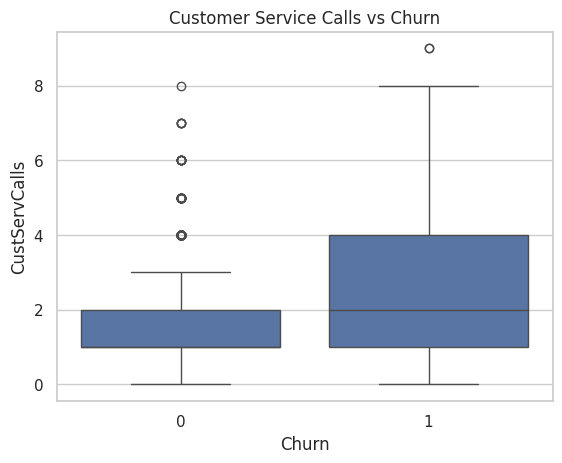

In [ ]:
sns.boxplot(x="Churn", y="CustServCalls", data=df)
plt.title("Customer Service Calls vs Churn")
plt.show()

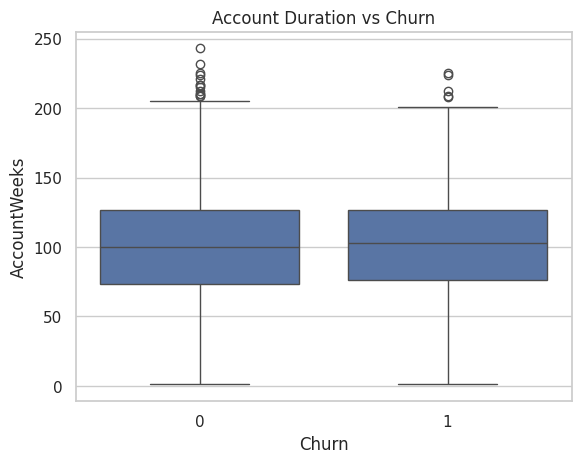

In [ ]:
sns.boxplot(x="Churn", y="AccountWeeks", data=df)
plt.title("Account Duration vs Churn")
plt.show()

# Korelasi Antar Variabel

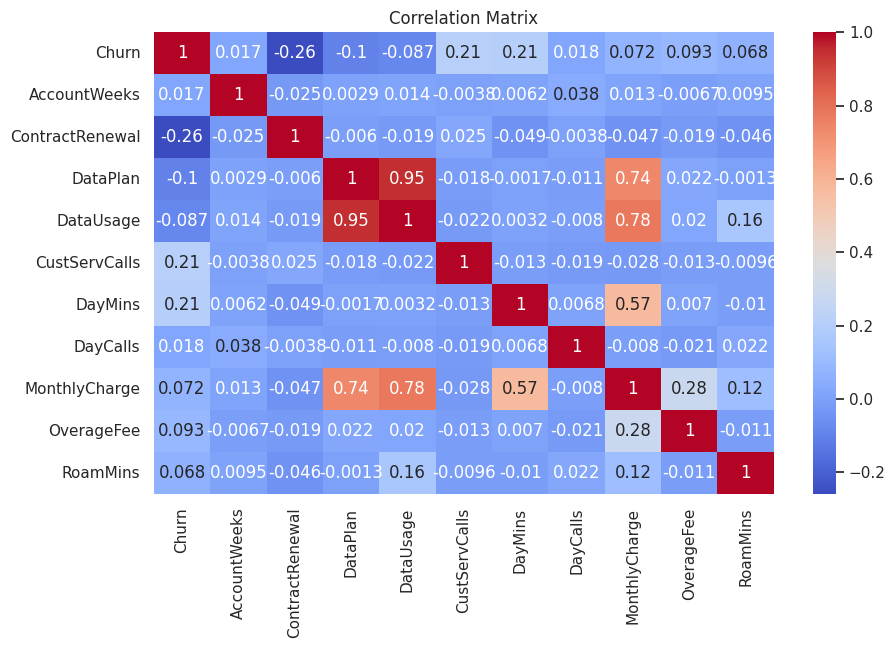

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

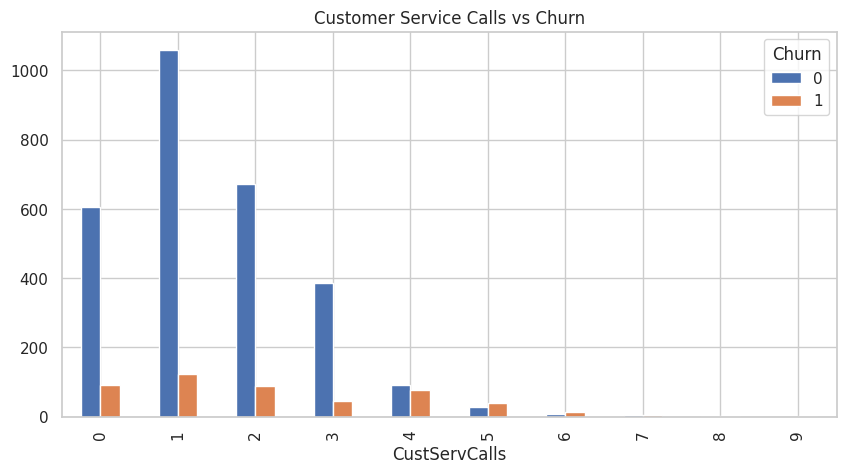

In [ ]:
pd.crosstab(df["CustServCalls"], df["Churn"]).plot(kind="bar", figsize=(10,5))
plt.title("Customer Service Calls vs Churn")
plt.show()

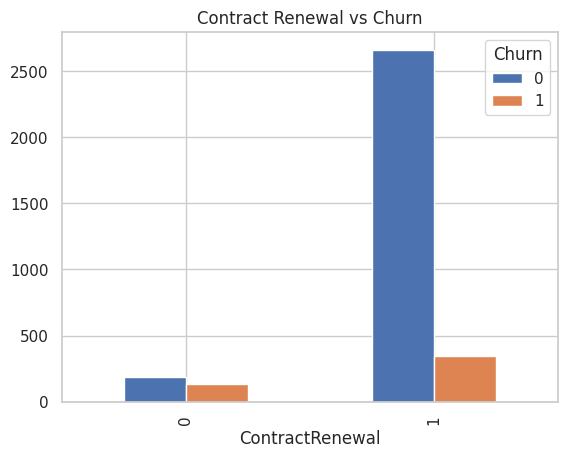

In [ ]:
pd.crosstab(df["ContractRenewal"], df["Churn"]).plot(kind="bar")
plt.title("Contract Renewal vs Churn")
plt.show()

## Final Business Recommendation

1. Tingkatkan kualitas customer service untuk mengurangi churn.
2. Berikan promo kontrak jangka panjang.
3. Evaluasi pricing untuk pelanggan berbiaya tinggi.
4. Fokus retensi pelanggan dengan komplain tinggi.

# Build Model

# Feature

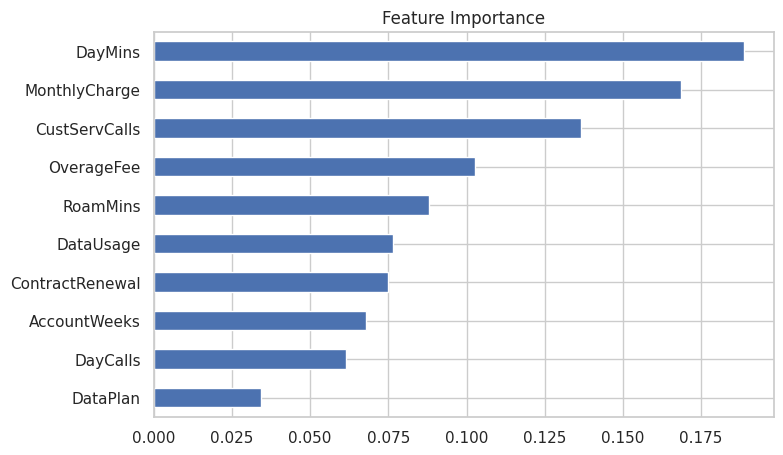

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop("Churn", axis=1)
y = df["Churn"]

model = RandomForestClassifier()
model.fit(X, y)

pd.Series(model.feature_importances_, index=X.columns)\
.sort_values().plot(kind="barh", figsize=(8,5))

plt.title("Feature Importance")
plt.show()

# Encode Data

In [ ]:
df["Churn"] = df["Churn"].map({0:0, 1:1, "No":0, "Yes":1})
df["DataPlan"] = df["DataPlan"].map({0:0, 1:1, "No":0, "Yes":1})
df["ContractRenewal"] = df["ContractRenewal"].map({0:0, 1:1, "No":0, "Yes":1})

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8605697151424287
[[556  10]
 [ 83  18]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.64      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.76      0.58      0.60       667
weighted avg       0.84      0.86      0.83       667



# After SMOTE

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Sebelum SMOTE:")
print(y.value_counts())

print("\nSetelah SMOTE:")
print(y_resampled.value_counts())

Sebelum SMOTE:
Churn
0    2850
1     483
Name: count, dtype: int64

Setelah SMOTE:
Churn
0    2850
1    2850
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8017543859649123
[[468 117]
 [109 446]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       585
           1       0.79      0.80      0.80       555

    accuracy                           0.80      1140
   macro avg       0.80      0.80      0.80      1140
weighted avg       0.80      0.80      0.80      1140



In [ ]:
df["Churn_Risk"] = model.predict(X)

In [ ]:
df.to_csv("telecom_churn_clean.csv", index=False)